# Compulsory assignment 1 – Save the world with nuclear forensics 

## Background

Smuggling and illegal trade of nuclear powders has become a great concern across the globe. The safety of many people may be under threat if such powders ends up in the wrong hands (nuclear bombs, terrorist attacks, etc.). This has given rise to the research field named nuclear forensics, providing tools and methods to analyse such illegal nuclear powder. After confiscating illegal nuclear powders from smugglers, it is of greatest importance to identify rapidly its country of origin, such that investigations can get on right track as soon as possible.

So far, the accuracy of previously used methods / models has been disappointing. In their desperation of finding new and more accurate models, The International Institute of Nuclear Forensics (IINF) assigned the students of DAT300 to solve this extremely important and difficult task.

 

## Task

We see that in our compulsory assignment already quite a few groups achieved 100% accuracy on the Kaggle leaderboard with simple models. While we are happy that our students do well, the objective of our compulsory assignment (feature selection and feature engineering) loses relevance in this context. We wanted Kaggle to be part of the compulsory assignment, since many appreciated this in DAT200, but we see now that this did not work out as we hoped for with the data at hand. After all, the predictions are based on only one test-train-split and this may be problematic with datasets with so few samples. This is why we need to make some changes to the goals of this compulsory assignment and you will be given an extra two days for the submission (new deadline for submission on Canvas is set to 23:59h, October 16).

 

Important changes

1. You get the new data (120 samples) in a new Excel file named “DAT300 – CA 1_NEW.xlsx” that you will find on Canvas -> Files -> CA1. Use the new data and discard the data you got previously, since we made modifications to it (adding copies of existing rows modified with some noise) so it could be used at Kaggle.
2.    We want you to train classifiers that have high test set accuracy using as few features as possible. Few features make it easier to interpret the model and less computationally expensive.
3.    Compute classification accuracy based on many train-test-splits by modifying the random_state parameter in the train_test_split function in scikit-learn using the full 120 samples. Compute the average accuracy on the test set based on 100 random train-test-splits (70-30 split distribution). We have done this in the Jupyter Notebook “DAT300-FeatureSelectionEvaluation” used in lecture “DAT300 – week 38, Monday”. Specifically, see the code from subject “Drop-out example of modified Iris data”.
4.    Report feature importances of your top-3 models (different classifiers) towards the end of the Jupyter notebook.
5.    You are no longer required to upload your predictions to Kaggle. We will abandon the competition.

 

### Data

You will be given access to measurement data from 96 recent cases of confiscated illegal nuclear powders (your training data). Only yesterday, secret agents confiscated 32 new illegal nuclear powders of unknown origin (your test data) after a successfully coordinated international action against smugglers. We need your model to predict the country of origin for these as reliably as possible.

Image analysis algorithms were applied to the images of the nuclear powders and as a result, a large number of features were extracted. These features describe the various patterns within each image and should enable your model to distinguish between the countries of origin of each nuclear powder. The number of features is very high and you will probably need to reduce that number in order to build a classifier that predicts well. Feature engineering from existing features might also be an option to improve the classifier.

 

The features available to you are stored in a separate Excel sheets with the following names in file “Full_data.xlsx”:

 

Labels: The target variable. Contains the country of origin of each nuclear powder, six classes, balanced.

AMT: 500 features generated with the Angle Measure Technique. Note: These are spectra.

WT-originals: 173 features from Wavelet transformation

WT-LLL: 173 features from Wavelet transformation using combinations of high and low pass filters

WT-LLH: 173 features from Wavelet transformation using combinations of high and low pass filters

WT-LHL: 173 features from Wavelet transformation using combinations of high and low pass filters

WT-LHH: 173 features from Wavelet transformation using combinations of high and low pass filters

LBP: 60 features generated with the Local Binary Pattern algorithm.

 

Train data: index [0 to 95] (for all the above sheets)

Test data: index [96 to 127] (for all the above sheets, except sheet “Labels”). You need to predict the country of origin for these 32 samples.

 

Team work

You are requested to work in teams of three. Please select a group you would like to join on the DAT300 Canvas page found in People -> Tab “CA 1”. You can drag and drop your name into the group you would like to join.

 

Deliverables

    Each group must submit/upload their Jupyter notebook AND a PDF-version of the same Jupyter notebook to Canvas. You will probably test several different types of classifiers. We would like like to see accuracies (as provided by Kaggle) and hyperparamters of your top 3 classifiers in a pandas data frame towards the end of the notebook. You may report more if you wish.
    Each group must submit/upload their predictions from their best model to Kaggle. Your team name must appear on the leaderboard.

 

Kaggle

In-Class competition “NMBU – DAT300 – Nuclear Forensics”

https://www.kaggle.com/t/acfbb8bde46440689aadea75350d7ac6 (Lenker til en ekstern side.)Lenker til en ekstern side.

Please do not share this link with people outside the DAT300 course. We would like to keep the competition in-class.

 

### Presentation of results

Each group will have 10 minutes at their disposal to present their results to the class. You should use your Jupyter notebook for that. Dates for presentations are 18.10.2018 and 22.10.2018. Please give an indication to IINF agents “Kristian” and “Oliver” on which of the two days you would prefer.

Attendance on both presentation days is strongly recommended for all students.

## ????
- Check data: nan, shape,
- Har modellen ein brukar i SFS noko og seie? Ja, prøv dei beste. Nokon kan vere gode til å minimere feil i datasettet enn andre.
- Finne ut feature importance verdien, plotte desse.
- Finne feature importance etter ein har valgt ut feature importances før. eks er dei ti utvalgte viktige eller finn ein ut at kanskje berre 8 viktige nå.
- Ha med feature nummberet i dataframen, plotte dei utvalgte featureane til dei beste modellane.
- Før inn instillingane du brukar i sklearn metodane.

## Import

In [1]:
import warnings
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

# Sklearn tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline

# Sklearn clasifiers
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier, RidgeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB

# mlxtend
from mlxtend.evaluate import feature_importance_permutation
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# Set random seed
np.random.seed(0)

## Read data

In [2]:
filename = 'DAT300 - CA 1_NEW.xlsx'

# Reads the Excel sheet labels
target = pd.read_excel(filename, 
                       sheet_name='Target', 
                       index_col='Index')
target.head()
np.shape(target)

(120, 1)

In [3]:
# Read the data sheets to a dictionary containing multiple dataframes
data_dict = pd.read_excel(filename, sheet_name=None)

# Removes the label sheet from the dictionary
data_dict.pop('Target')

# Gather the different dataframes to one dataframe 
data = pd.DataFrame([])
for sheet in data_dict:
    data_dict[sheet].pop('Labels')
    data = pd.concat([data, data_dict[sheet]], axis=1)

data.index.name = 'Index'   

np.shape(data)
data.tail()

,1,2,3,4,5,6,7,8,9,10,...,"lbp_24_(24,3)","lbp_25_(24,3)","lbp_2_(24,3)","lbp_3_(24,3)","lbp_4_(24,3)","lbp_5_(24,3)","lbp_6_(24,3)","lbp_7_(24,3)","lbp_8_(24,3)","lbp_9_(24,3)"
Index,,,,,,,,,,,,,,,,,,,,,
115,1.44326,1.29918,1.26397,1.28804,1.30633,1.28322,1.35760,1.41291,1.42653,1.42816,...,48350,406116,15814,14562,18572,23352,26747,30653,32646,36111
116,1.55224,1.54247,1.50166,1.50247,1.47951,1.46093,1.45250,1.43780,1.45197,1.45796,...,57365,492386,17447,15326,18481,21572,22992,24455,24968,25650
117,1.47625,1.38072,1.31913,1.29623,1.32717,1.34358,1.36896,1.44307,1.49027,1.48877,...,54924,480599,16885,14787,18048,21597,23073,25103,25891,26807
118,1.58632,1.56810,1.58883,1.55774,1.53981,1.59218,1.60815,1.63842,1.66459,1.67012,...,56665,489776,17698,15603,18951,21667,23250,24673,24799,25170
119,1.48483,1.38989,1.40648,1.42138,1.38825,1.38875,1.42632,1.45532,1.43693,1.43337,...,54463,474159,16636,15118,18303,21787,23630,25362,26296,27966


## Splitting and encoding data

In [4]:
# Give new names to the data
X = data.copy()
y = target.copy()

# I encode only the feature target because it is the only string variable.
lb_enc = LabelEncoder()
lb_enc.fit(y["Labels"])
y = lb_enc.transform(y["Labels"])

# Standardise the data
sc = StandardScaler()
sc.fit_transform(X)

array([[ 1.06977486,  1.0139147 ,  0.60540945, ...,  0.44979646,
         0.34648557,  0.36995908],
       [ 0.39047277,  0.48889923,  0.5636593 , ...,  0.61230338,
         0.65701869,  0.620713  ],
       [ 0.22589958,  0.378127  ,  0.45361935, ...,  0.334307  ,
         0.38786893,  0.33456122],
       ...,
       [-0.31592032, -0.63029047, -0.85626523, ..., -0.36775938,
        -0.14727157, -0.19389467],
       [ 1.71258703,  1.58491779,  1.97288404, ..., -0.56404582,
        -0.49223817, -0.5677418 ],
       [-0.15779737, -0.52188264,  0.06003507, ..., -0.24953104,
        -0.01933066,  0.07079002]])

## PCA

Of the original 1425 components, 6 components explain 0.9983 of the variance.


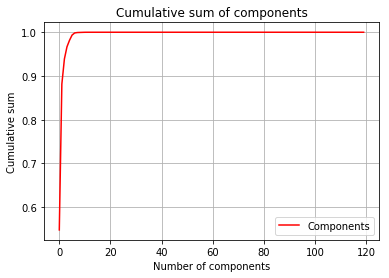

In [5]:
from sklearn.decomposition import PCA

# Fitt PCA to the training sett
pca_test = PCA()
pca_test.fit_transform(X)

# Plot cumulative sum of components and feature importance
plt.figure()
plt.title('Cumulative sum of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative sum')
plt.grid()
plt.plot(np.cumsum(pca_test.explained_variance_ratio_), 'r-', label='Components')
plt.legend()
pca_explained = np.cumsum(pca_test.explained_variance_ratio_)[6]

original_c_f = np.shape(X)[1]
print('Of the original {0} components, 6 components explain {1:.4} of the\
 variance.'.format(original_c_f, pca_explained))

## Baseline

Test the raw data to see how good different models fit to the 'raw' data. The result showed that some of the classifiers managed to achive a test score above 90%!

In [6]:
def test_multiple_classifiers(X, y, classifiers, cv=5, splits=100):
    
    # Table to store classifier performance:
    table_columns = ['Name','Test Accuracy','Train Accuracy',
                     'Runtime', 'Number of features']
    Classifier_table = pd.DataFrame(columns = table_columns)

    # Removes warning that variables are colinear
    warnings.filterwarnings("ignore")
    
    # Create n different test train splits for every classifier
    for i, clf in enumerate(classifiers):
        label = clf.__class__.__name__
    
        # Stores results of splits
        cv_test_score = []
        cv_train_score = []
        cv_runtime_score = []
        
        for split in range(splits):
            
            # Split up data into training and test sets
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.3, random_state=split, stratify=y)
            
            # Cross validation
            scores = cross_validate(estimator=clf,
                                     X=X_train,
                                     y=y_train,
                                     cv=cv,
                                     n_jobs=-1)
            
            
            cv_test_score.append(scores['test_score'].mean())
            cv_train_score.append(scores['train_score'].mean())
            cv_runtime_score.append(scores['fit_time'].sum())
            
            
            # Print progress to screen
            sys.stderr.write('\r Classifier: {0}/{1} Split: {2}/{3}'.format(i+1, len(classifiers), split+1, splits))
            sys.stderr.flush()
           
        
        # Stores the average result of the splits
        Classifier_table.loc[i, 'Name'] = clf.__class__.__name__
        Classifier_table.loc[i, 'Number of features'] = np.shape(X)[1]
        Classifier_table.loc[i, 'Test Accuracy'] = np.mean(cv_test_score)
        Classifier_table.loc[i, 'Train Accuracy'] = np.mean(cv_train_score)
        Classifier_table.loc[i, 'Runtime'] = np.sum(cv_runtime_score)
            
        #print('Finished classifier {0} of {1}'.format(i+1, len(classifiers)))
        
        
        
        

    # Turns on warnings again
    warnings.filterwarnings("default")
    
    # Sorts data by test score
    Classifier_table.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)
    
    return Classifier_table

In [7]:
# List of classifiers to test
classifiers = [
    PassiveAggressiveClassifier(),
    BernoulliNB(),
    GaussianNB(),
    Perceptron(),
    LogisticRegression(),
    SVC(kernel='rbf'),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    NearestCentroid(),
    LinearDiscriminantAnalysis(),
    BaggingClassifier(),
    #LinearSVC() # Slow,
    #AdaBoostClassifier(), # Slow
    #GradientBoostingClassifier() # Slow
    ]

# Make dataframe with baseline scores
baseline_df = test_multiple_classifiers(X, y, classifiers, cv=5, splits=100)

 Classifier: 12/12 Split: 100/100

In [8]:
baseline_df

,Name,Test Accuracy,Train Accuracy,Runtime,Number of features
10,LinearDiscriminantAnalysis,0.934278,0.99378,50.9899,1425
11,BaggingClassifier,0.931722,0.997631,247.597,1425
7,RandomForestClassifier,0.919389,0.996836,30.6954,1425
6,DecisionTreeClassifier,0.876389,1,35.674,1425
2,GaussianNB,0.839389,0.930654,8.07373,1425
4,LogisticRegression,0.822944,0.978293,414.858,1425
8,KNeighborsClassifier,0.550611,0.688957,6.6374,1425
1,BernoulliNB,0.508778,0.658838,19.4796,1425
9,NearestCentroid,0.325722,0.400692,5.20822,1425
0,PassiveAggressiveClassifier,0.201778,0.220962,26.4633,1425


## Feature selection
### Plotting feature importances of original data

Reducing the dimention of the dataset can be benefitial when trying to make a better, more robust and faster model. To do this job one can use feature selection algorithms. They work by trying to automatically select a subset of features that is most relevant to the problem. The result of the algorithm was a redused dataset now containing only five features, compared to the original 1425.  

I chose to use the LinearDiscriminantAnalysis classifier when testing and trying models, because it scored high on the raw data and was relatively fast.

In [9]:
def find_feature_importances(X, y):
    # Split data into training and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                        random_state=0, stratify=y)

    model = LinearDiscriminantAnalysis()
    model.fit(X_train,y_train)

    # Brukar numpy array ikkje dataframe, .values
    imp_vals, imp_all = feature_importance_permutation(
        predict_method=model.predict, 
        X=X_test,
        y=y_test,
        metric='accuracy',
        num_rounds=100,
        seed=0)
    
    return imp_vals

In [10]:
def plot_feature_importances(X, X_feature_importances):
    # Histogram of features in the original data
    plt.figure(figsize=(8, 8), dpi=300)


    # Unsorted features
    ax1 = plt.subplot(211)
    plt.xlabel('Feature number')
    plt.bar(range(X.shape[1]), X_feature_importances)
    plt.ylabel('Importance')
    plt.title('Feature importance of data')
    plt.grid()

    # Sorted features
    ax2 = plt.subplot(212)
    plt.xlabel('Features sorted by value')
    plt.bar(range(X.shape[1]), sorted(X_feature_importances))
    plt.ylabel('Importance')
    plt.grid()

    plt.show()

In [11]:
imp_vals_org = find_feature_importances(X.values, y)

/home/landsat8/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/landsat8/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


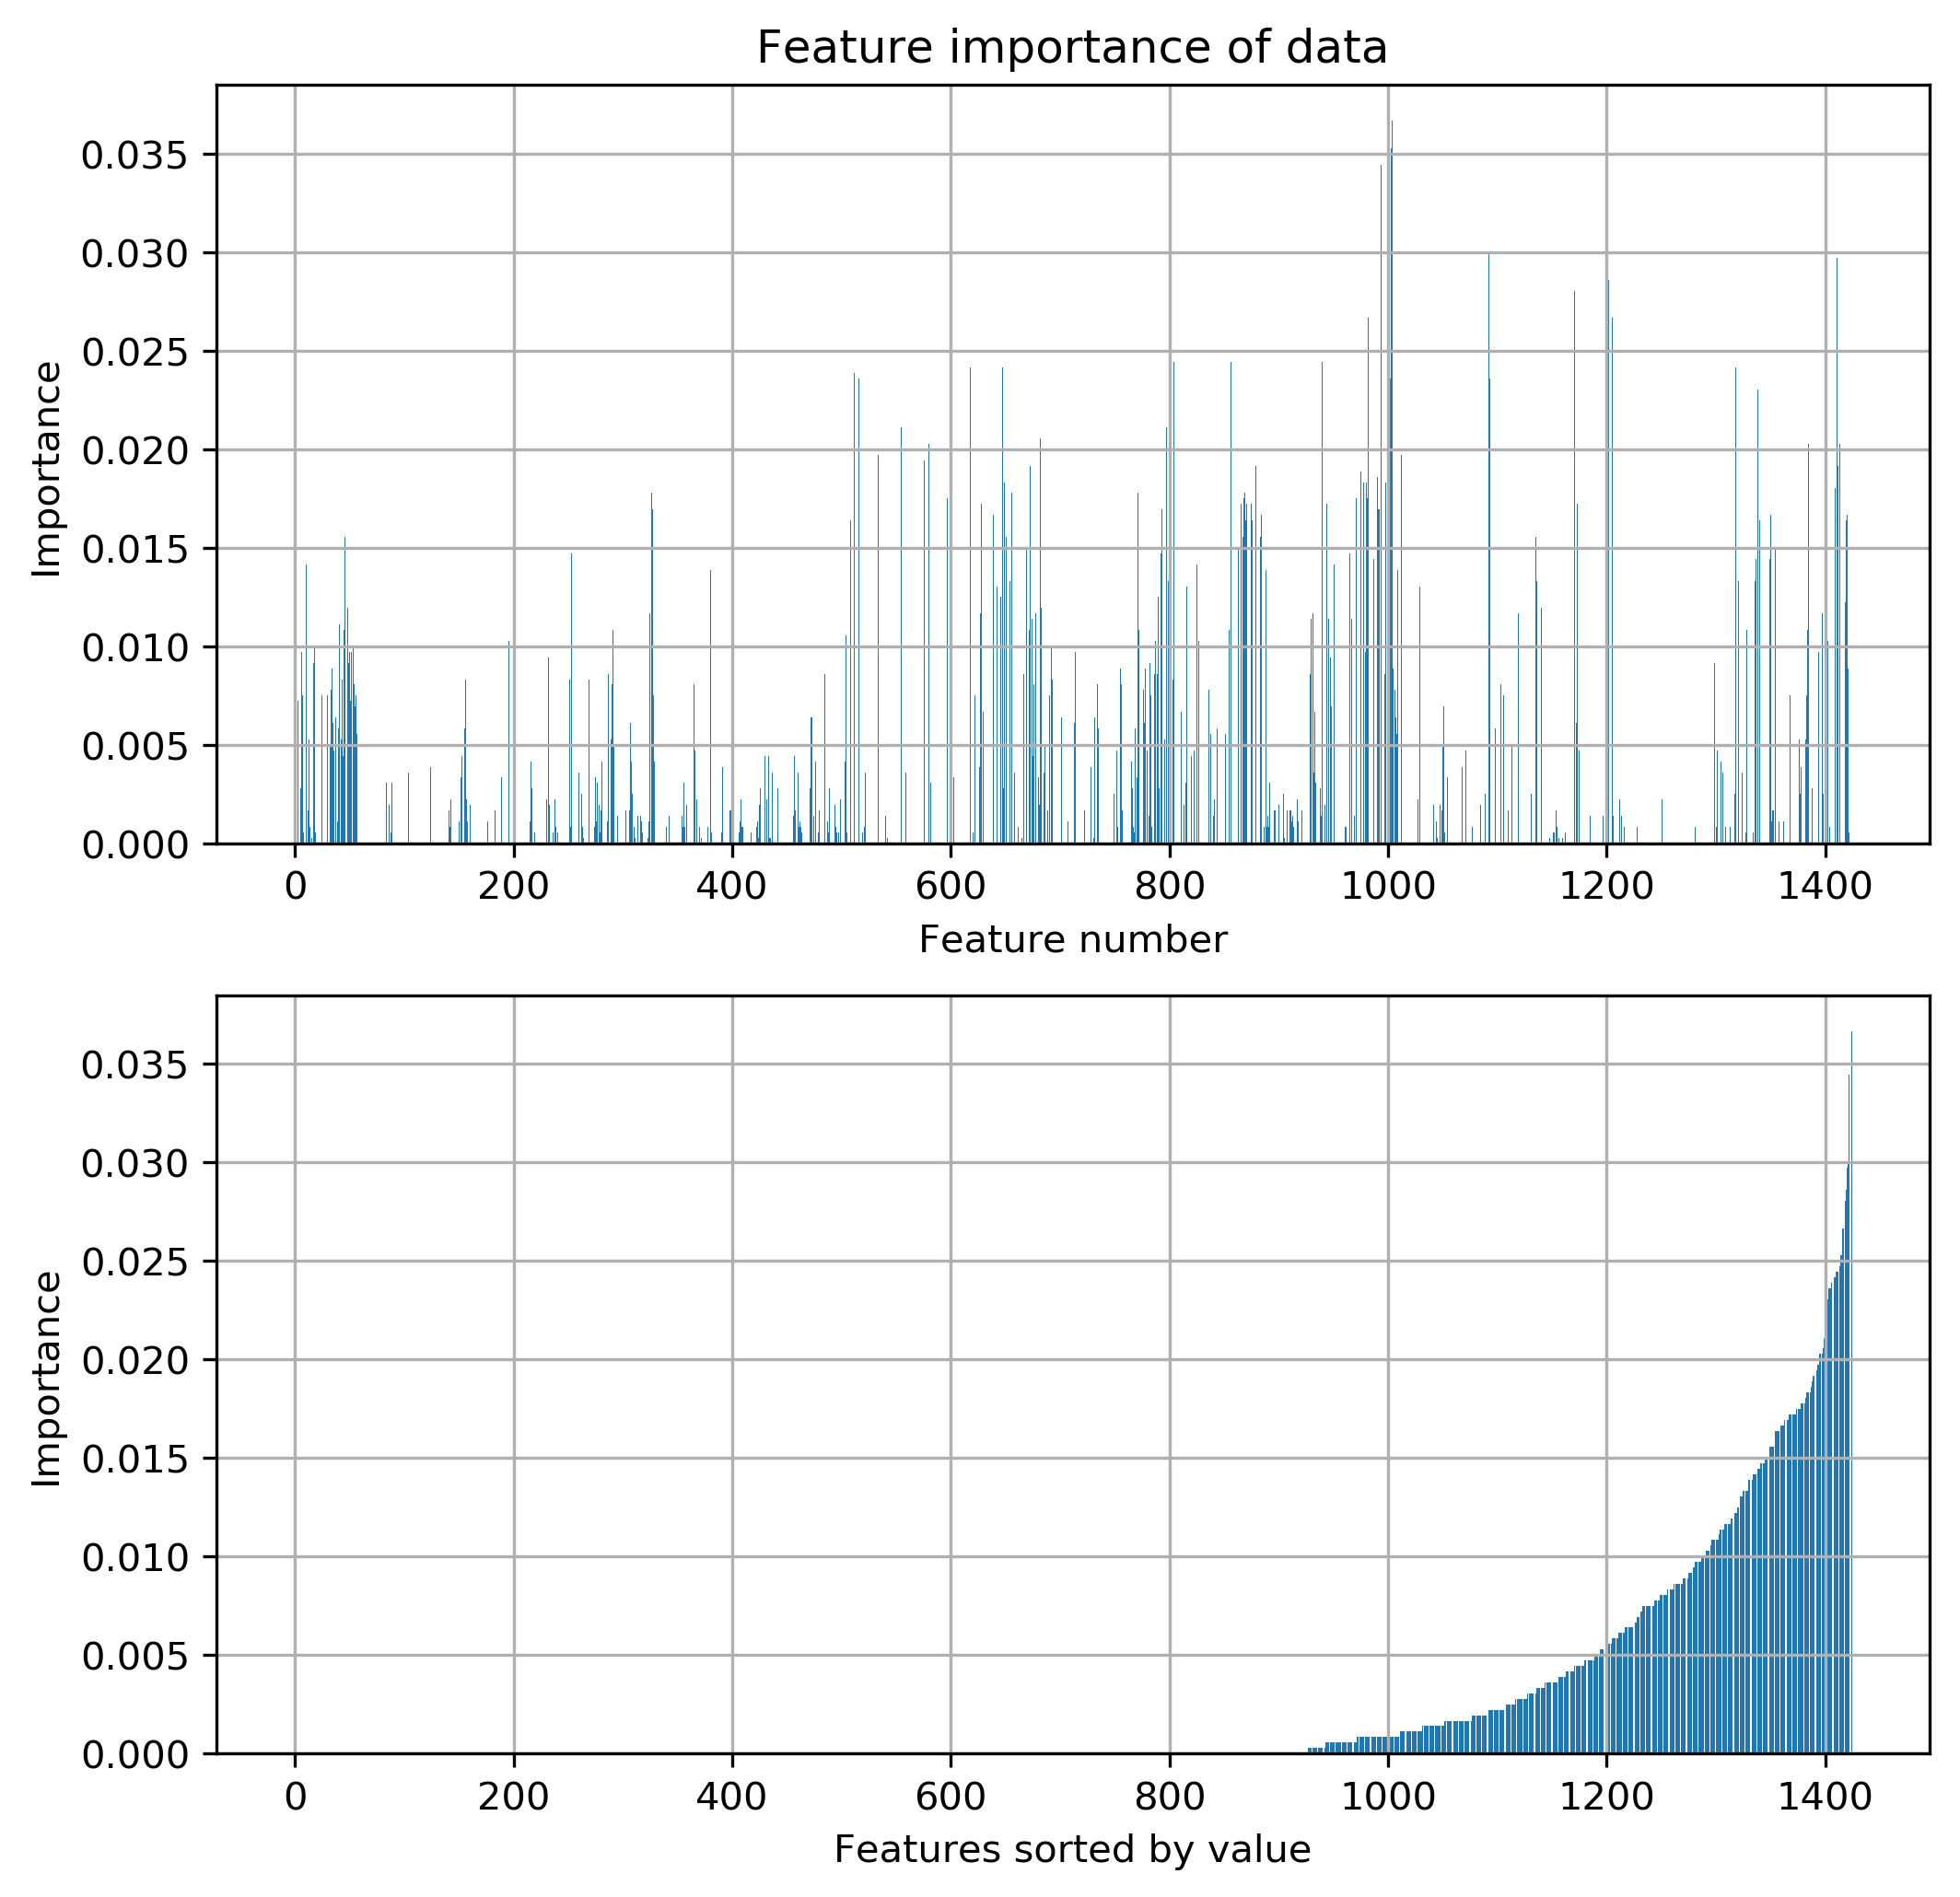

In [12]:
plot_all = plot_feature_importances(X, imp_vals_org)

### Forward feature selection
Using forward feature selection the best combination of features in the dataset can be found. Here a combination off up to 50 features was tried.

In [13]:
# Initialise a logistic regression classifier
lda = LinearDiscriminantAnalysis()

# Select best number of features in range
feat_range = (1,30)

# Initialise the SFS class in forward mode
sfs = SFS(lda, 
           k_features=feat_range, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=5,
           n_jobs=-1)

# Removes warning that variables are colinear
warnings.filterwarnings("ignore")

# Fit the data and compute accuracies for increasing number of features
sfs_org = sfs.fit(X, y)

# Turns on warnings again
warnings.filterwarnings("default")

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 1418 out of 1425 | elapsed:   39.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 1425 out of 1425 | elapsed:   39.4s finished

[2018-10-03 13:19:55] Features: 1/30 -- score: 0.6833333333333333[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 1424 out of 1424 | elapsed:   39.3s finished

[2018-10-03 13:20:35] Features: 2/30 -- score: 0.8416666666666668[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    9.2s
[Parallel(n_jobs=


[2018-10-03 13:34:55] Features: 20/30 -- score: 0.9416666666666668[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done 1398 out of 1405 | elapsed:   50.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 1405 out of 1405 | elapsed:   50.2s finished

[2018-10-03 13:35:45] Features: 21/30 -- score: 0.9583333333333334[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 1404 out of 1404 | elapsed:   59.7s finished

[2018-10-03 13:36:45] Features: 22/30 -- score: 0.9583333333333334[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.4s
[Parallel(

In [14]:
sfs_df_org = pd.DataFrame(sfs.subsets_).transpose()
sfs_df_org

,avg_score,cv_scores,feature_idx,feature_names
1,0.683333,"[0.625, 0.625, 0.7916666666666666, 0.791666666...","(1371,)","(lbp_0_(8,1),)"
2,0.841667,"[0.8333333333333334, 0.8333333333333334, 0.875...","(534, 1371)","(JointAverage_glcm1_originals, lbp_0_(8,1))"
3,0.9,"[0.8333333333333334, 1.0, 0.9166666666666666, ...","(534, 615, 1371)","(JointAverage_glcm1_originals, IMC1_glcm15_ori..."
4,0.908333,"[0.8333333333333334, 1.0, 0.9166666666666666, ...","(534, 615, 793, 1371)","(JointAverage_glcm1_originals, IMC1_glcm15_ori..."
5,0.933333,"[0.8333333333333334, 1.0, 1.0, 0.8333333333333...","(52, 534, 615, 793, 1371)","(53, JointAverage_glcm1_originals, IMC1_glcm15..."
6,0.933333,"[0.8333333333333334, 1.0, 1.0, 0.8333333333333...","(17, 52, 534, 615, 793, 1371)","(18, 53, JointAverage_glcm1_originals, IMC1_gl..."
7,0.933333,"[0.8333333333333334, 1.0, 1.0, 0.8333333333333...","(0, 17, 52, 534, 615, 793, 1371)","(1, 18, 53, JointAverage_glcm1_originals, IMC1..."
8,0.933333,"[0.8333333333333334, 1.0, 1.0, 0.8333333333333...","(0, 1, 17, 52, 534, 615, 793, 1371)","(1, 2, 18, 53, JointAverage_glcm1_originals, I..."
9,0.933333,"[0.8333333333333334, 1.0, 1.0, 0.8333333333333...","(0, 1, 2, 17, 52, 534, 615, 793, 1371)","(1, 2, 3, 18, 53, JointAverage_glcm1_originals..."
10,0.933333,"[0.8333333333333334, 1.0, 1.0, 0.8333333333333...","(0, 1, 2, 3, 17, 52, 534, 615, 793, 1371)","(1, 2, 3, 4, 18, 53, JointAverage_glcm1_origin..."


<Figure size 432x288 with 0 Axes>

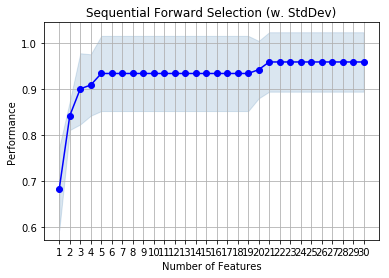

In [15]:
plt.figure()
fig_sfs_std = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

<Figure size 432x288 with 0 Axes>

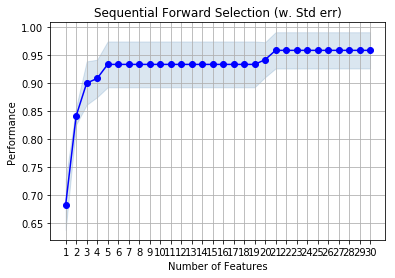

In [16]:
plt.figure()
fig_sfs_err = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. Std err)')
plt.grid()
plt.show()

In [17]:
# Generate a new subsets based on the selected features
X_subset = sfs_org.transform(X)

print(f'The original data contains {np.shape(X)[0]} rows and {np.shape(X)[1]} collums')
print(f'The subset contains {np.shape(X_subset)[0]} rows and {np.shape(X_subset)[1]} collums')

The original data contains 120 rows and 1425 collums
The subset contains 120 rows and 21 collums


### Plotting feature importances of subset
Finding the feature importances of the subset to see how they compare and if another reduction can be usefull.

In [18]:
imp_vals_subset = find_feature_importances(X_subset, y)

/home/landsat8/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


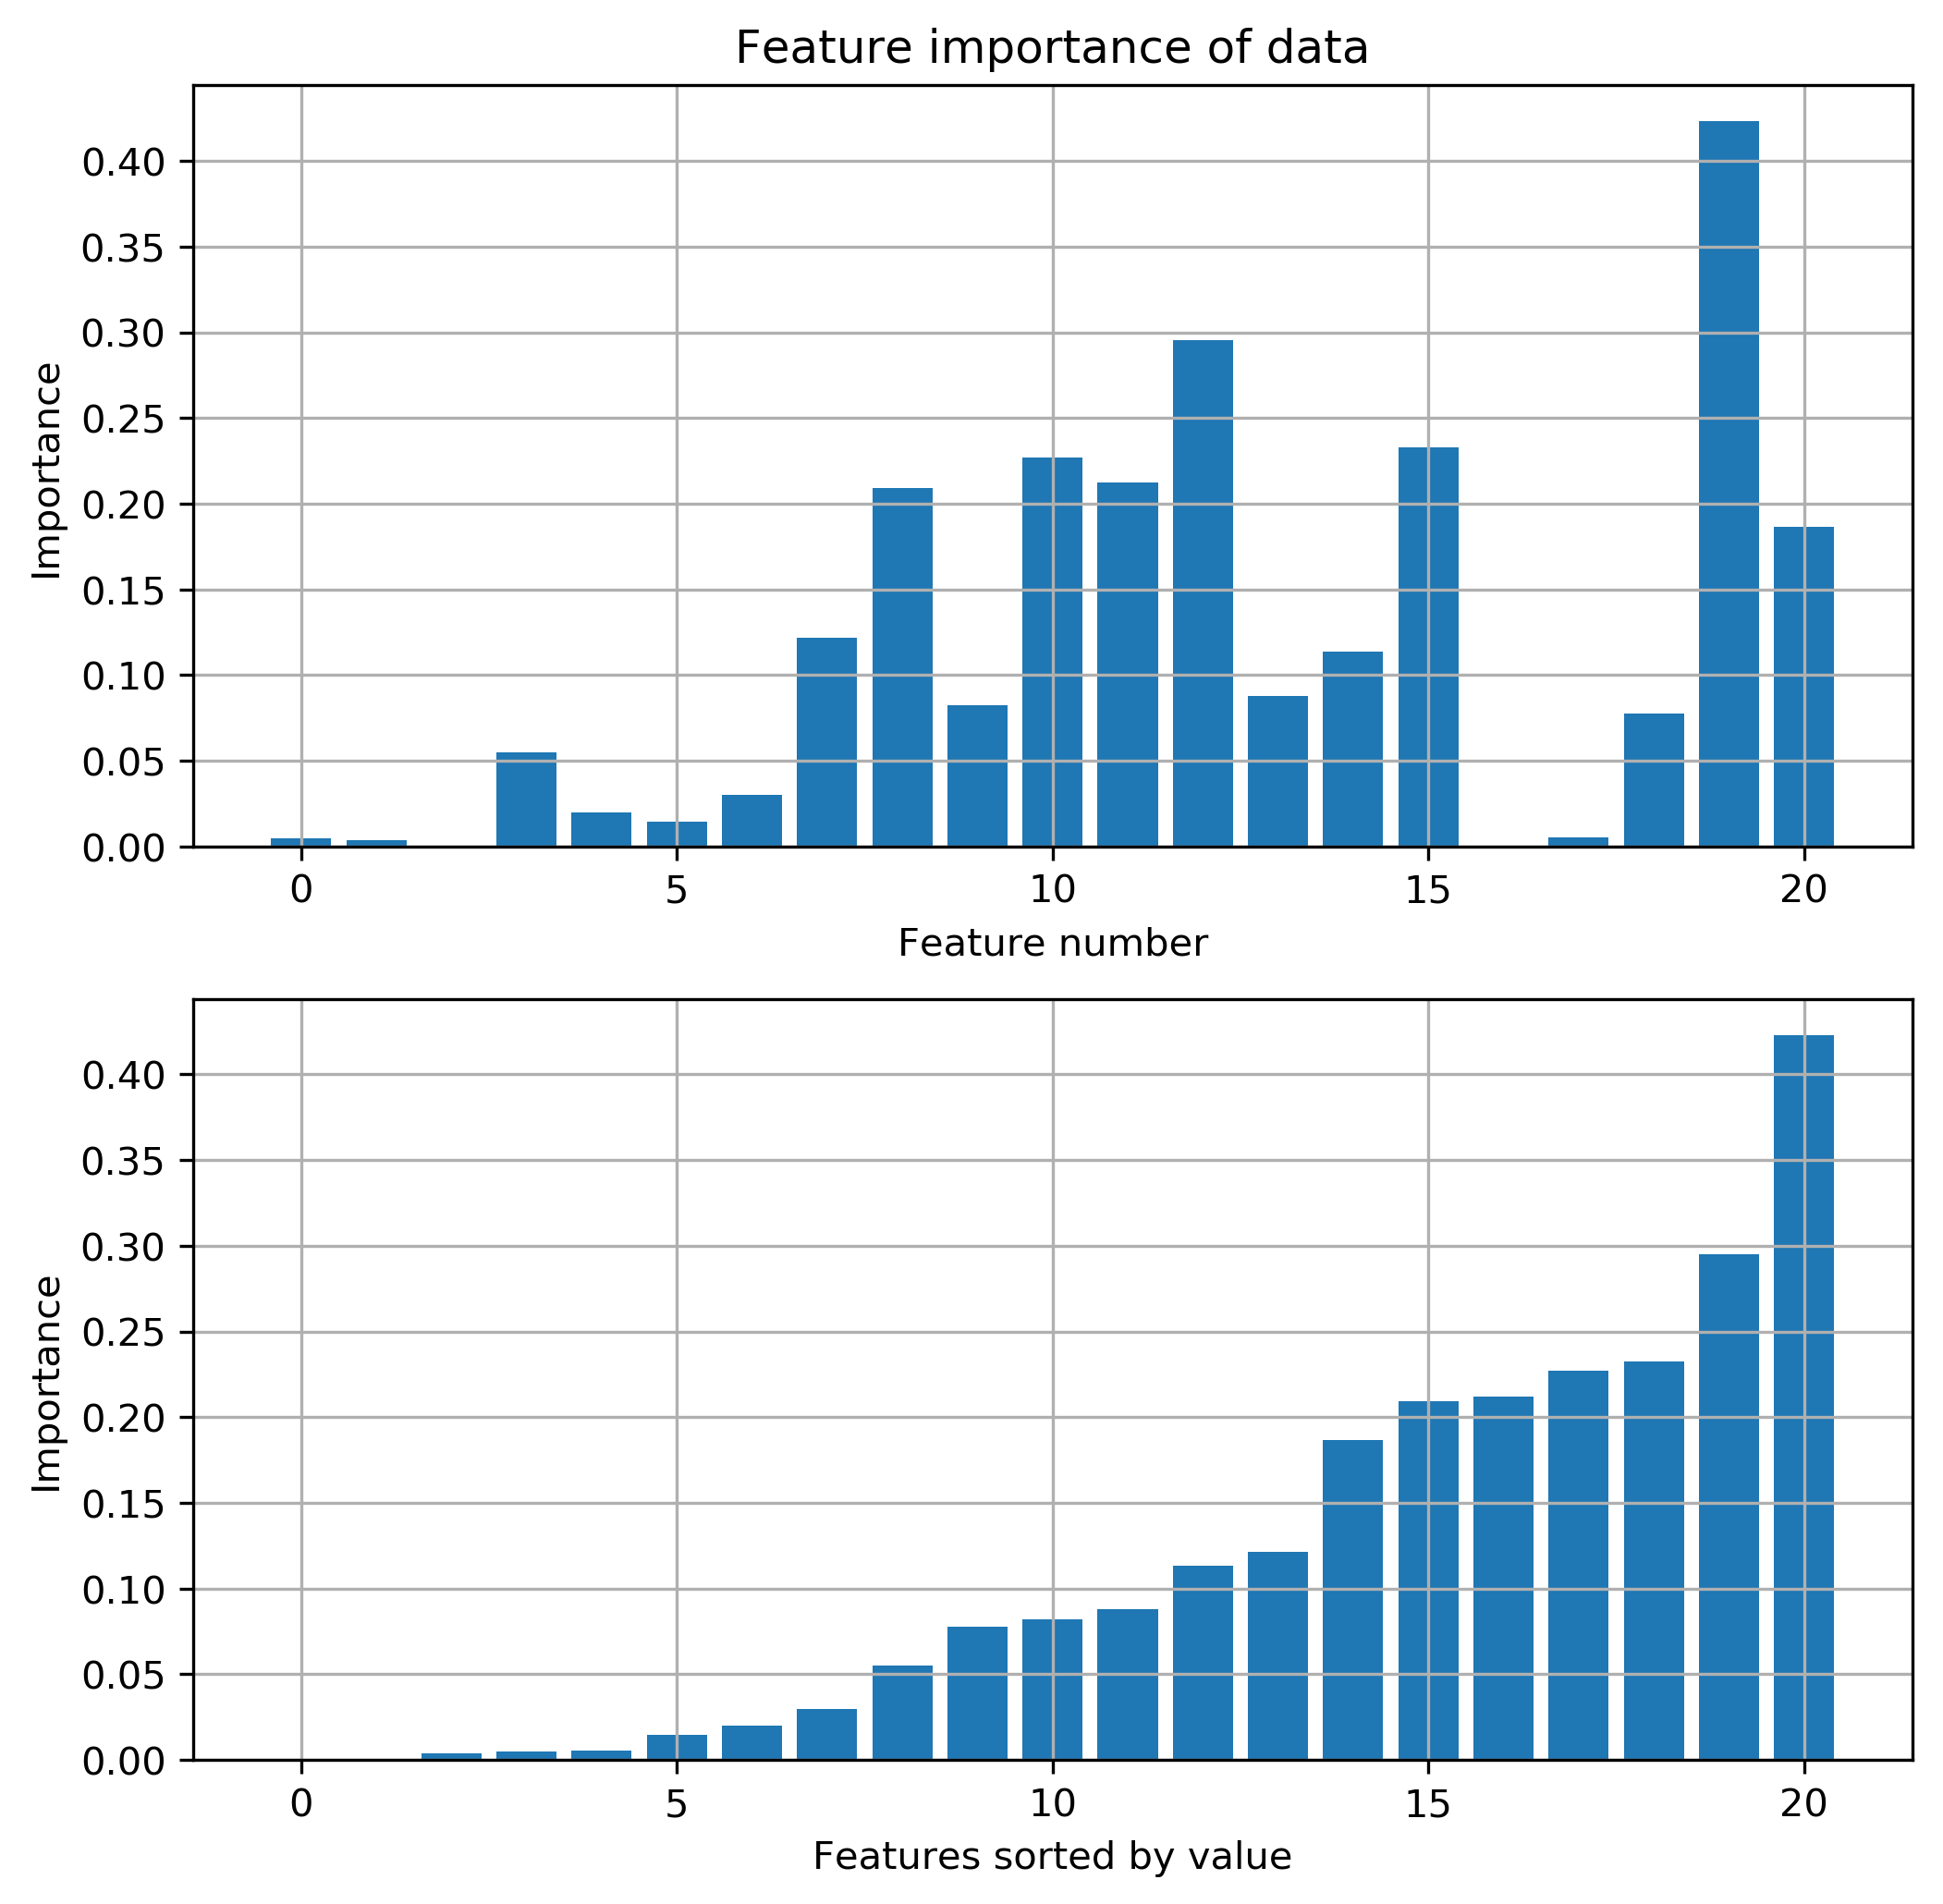

In [19]:
plot_subset = plot_feature_importances(X_subset, imp_vals_subset)

Looking at the subsetplot i decided to reduce the number of features again. Limiting the maximal number of features to 10.

In [20]:
# Initialise a logistic regression classifier
lda = LinearDiscriminantAnalysis()

# Select best number of features in range
feat_range = (1,10)

# Initialise the SFS class in forward mode
sfs = SFS(lda, 
           k_features=feat_range, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=5,
           n_jobs=-1)

# Removes warning that variables are colinear
warnings.filterwarnings("ignore")

# Fit the data and compute accuracies for increasing number of features
sfs_subset = sfs.fit(X_subset, y)

# Turns on warnings again
warnings.filterwarnings("default")

[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.3s finished

[2018-10-03 13:41:33] Features: 1/10 -- score: 0.6833333333333333[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.3s finished

[2018-10-03 13:41:33] Features: 2/10 -- score: 0.8416666666666668[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.3s finished

[2018-10-03 13:41:33] Features: 3/10 -- score: 0.9[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.5s finished

[2018-10-03 13:41:34] Features: 4/10 -- score: 0.9083333333333334[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.4s finished

[2018-10-03 13:41:35] Features: 5/10 -- score: 0.9333333333333333[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.3s finished

[2018-10-03 13:41:35] Features: 6/10 -- score: 0.9333333333333333[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.3s finished

[2018-10-03 13:41:36] Features: 7/10 -- 

In [21]:
sfs_df_subset = pd.DataFrame(sfs.subsets_).transpose()
sfs_df_subset

,avg_score,cv_scores,feature_idx,feature_names
1,0.683333,"[0.625, 0.625, 0.7916666666666666, 0.791666666...","(19,)","(19,)"
2,0.841667,"[0.8333333333333334, 0.8333333333333334, 0.875...","(15, 19)","(15, 19)"
3,0.9,"[0.8333333333333334, 1.0, 0.9166666666666666, ...","(15, 17, 19)","(15, 17, 19)"
4,0.908333,"[0.8333333333333334, 1.0, 0.9166666666666666, ...","(15, 17, 18, 19)","(15, 17, 18, 19)"
5,0.933333,"[0.8333333333333334, 1.0, 1.0, 0.8333333333333...","(13, 15, 17, 18, 19)","(13, 15, 17, 18, 19)"
6,0.933333,"[0.8333333333333334, 1.0, 1.0, 0.8333333333333...","(11, 13, 15, 17, 18, 19)","(11, 13, 15, 17, 18, 19)"
7,0.933333,"[0.8333333333333334, 1.0, 1.0, 0.8333333333333...","(0, 11, 13, 15, 17, 18, 19)","(0, 11, 13, 15, 17, 18, 19)"
8,0.933333,"[0.8333333333333334, 1.0, 1.0, 0.8333333333333...","(0, 1, 11, 13, 15, 17, 18, 19)","(0, 1, 11, 13, 15, 17, 18, 19)"
9,0.933333,"[0.8333333333333334, 1.0, 1.0, 0.8333333333333...","(0, 1, 2, 11, 13, 15, 17, 18, 19)","(0, 1, 2, 11, 13, 15, 17, 18, 19)"
10,0.933333,"[0.8333333333333334, 1.0, 1.0, 0.8333333333333...","(0, 1, 2, 3, 11, 13, 15, 17, 18, 19)","(0, 1, 2, 3, 11, 13, 15, 17, 18, 19)"


In [22]:
# Generate a new subsets based on the selected features
X_subset_reduced = sfs_subset.transform(X_subset)

print(f'The original data contains {np.shape(X_subset)[0]} rows and {np.shape(X_subset)[1]} collums')
print(f'The subset contains {np.shape(X_subset_reduced)[0]} rows and {np.shape(X_subset_reduced)[1]} collums')

The original data contains 120 rows and 21 collums
The subset contains 120 rows and 5 collums


In [34]:
imp_vals_subset_reduced = find_feature_importances(X_subset_reduced, y)

/home/landsat8/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


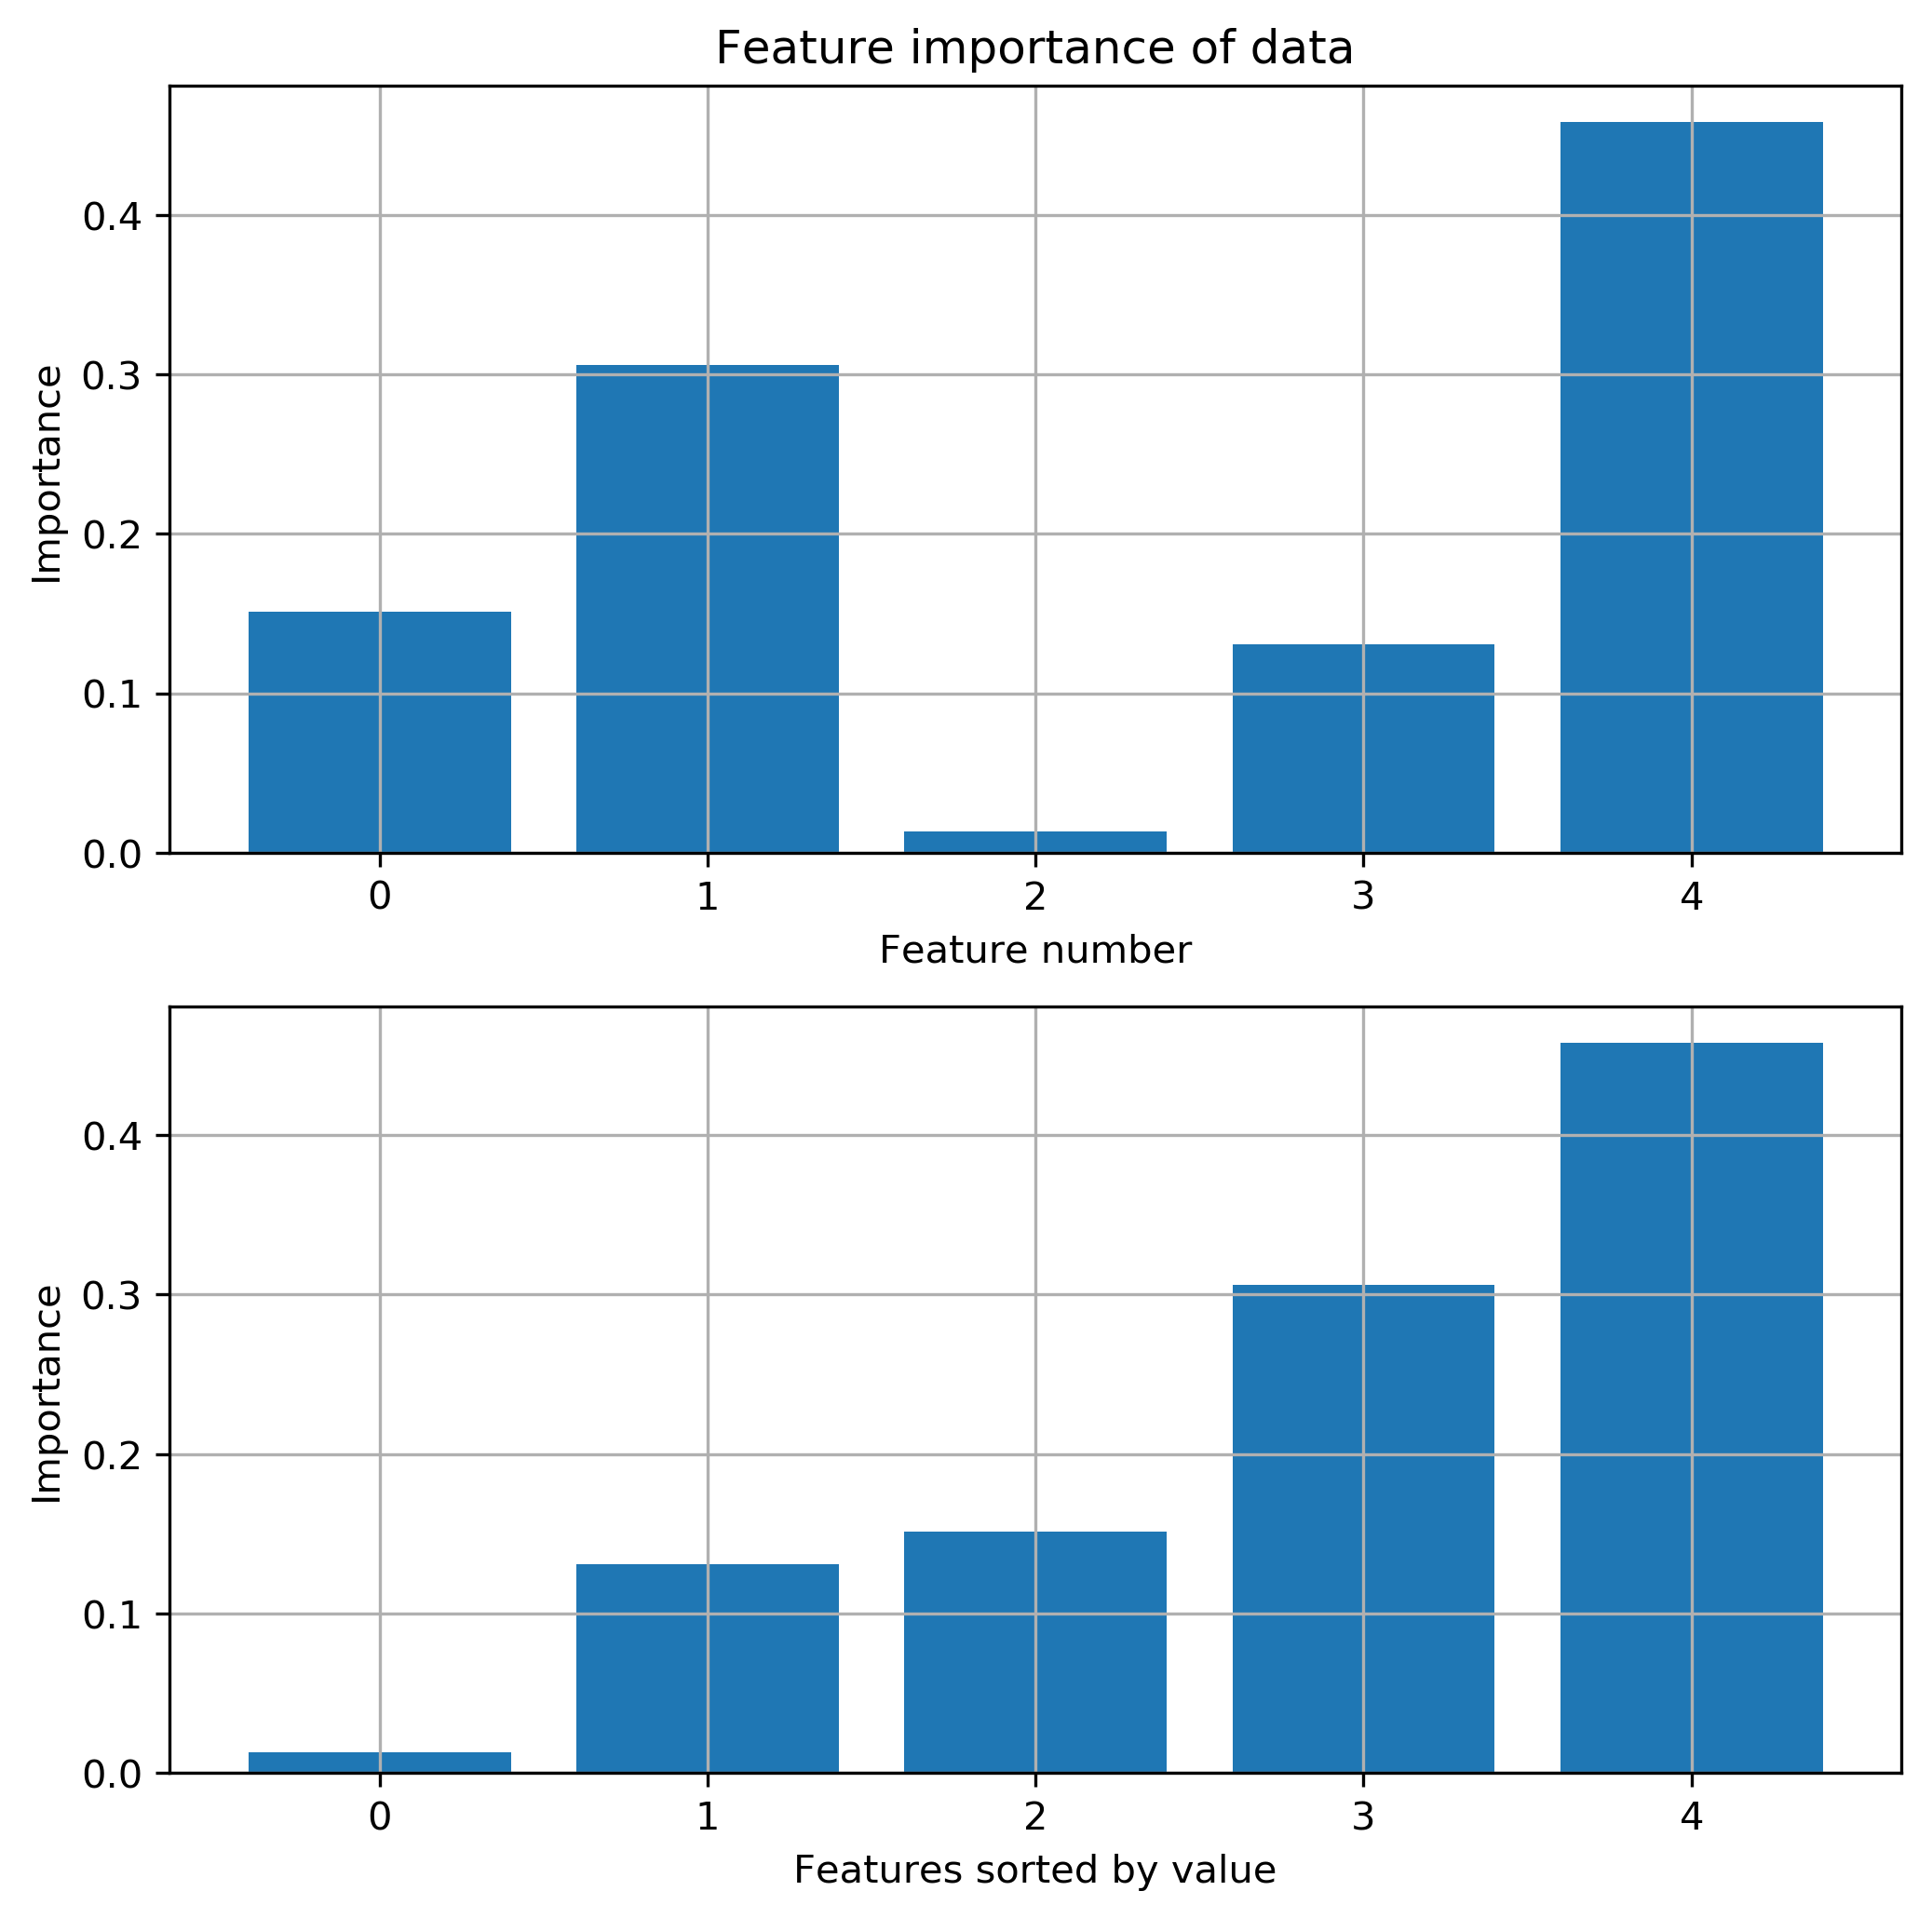

In [35]:
plot_subset = plot_feature_importances(X_subset_reduced, imp_vals_subset_reduced)

In [23]:
# Make dataframe with scores of selected features
features_df = test_multiple_classifiers(X_subset_reduced, y, classifiers, cv=5, splits=100)
features_df

 Classifier: 12/12 Split: 100/100

,Name,Test Accuracy,Train Accuracy,Runtime,Number of features
10,LinearDiscriminantAnalysis,0.915778,0.941922,6.82278,5
11,BaggingClassifier,0.915722,0.993338,19.8346,5
7,RandomForestClassifier,0.902167,0.993078,20.2848,5
6,DecisionTreeClassifier,0.892611,1,1.07436,5
2,GaussianNB,0.862278,0.882391,1.80296,5
9,NearestCentroid,0.660444,0.672606,1.06952,5
8,KNeighborsClassifier,0.649556,0.731909,1.23851,5
5,SVC,0.265889,1,1.71117,5
0,PassiveAggressiveClassifier,0.167444,0.167333,2.85084,5
1,BernoulliNB,0.166667,0.166667,4.46272,5


## Feature engineering
Improving the score.

In [24]:
# Split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X_subset_reduced, y, test_size=0.3, 
                                                    random_state=3, stratify=y)


model_engineered = make_pipeline(FunctionTransformer(np.log1p, validate=True),
                                 #FunctionTransformer(ss.boxcox, validate=True),
                      StandardScaler(),
                      LinearDiscriminantAnalysis())


model_engineered.fit(X_train, y_train)

engineered_score  = model_engineered.score(X_test, y_test)

print('Baseline score:')
print(engineered_score)

Baseline score:
0.8611111111111112


/home/landsat8/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


In [25]:
# Generate a new subsets based on the engineered features
X_subset_eng = model_engineered.transform(X_subset_reduced)


print(f'The original data contains {np.shape(X_subset_reduced)[0]} rows and {np.shape(X_subset_reduced)[1]} collums')
print(f'The subset contains {np.shape(X_subset_eng)[0]} rows and {np.shape(X_subset_eng)[1]} collums')

The original data contains 120 rows and 5 collums
The subset contains 120 rows and 5 collums


In [26]:
# Make dataframe with engineered values
engineering_df = test_multiple_classifiers(X_subset_eng, y, classifiers, cv=5, splits=100)

 Classifier: 12/12 Split: 100/100

In [27]:
engineering_df

,Name,Test Accuracy,Train Accuracy,Runtime,Number of features
2,GaussianNB,0.931167,0.968851,1.87238,5
5,SVC,0.923056,0.989732,2.1738,5
10,LinearDiscriminantAnalysis,0.915667,0.942109,6.95768,5
8,KNeighborsClassifier,0.909389,0.943356,1.44035,5
11,BaggingClassifier,0.909,0.992404,18.9553,5
9,NearestCentroid,0.907667,0.924035,1.26747,5
7,RandomForestClassifier,0.901444,0.994702,23.3642,5
4,LogisticRegression,0.8915,0.935045,2.39183,5
6,DecisionTreeClassifier,0.877389,1,1.31471,5
0,PassiveAggressiveClassifier,0.831111,0.870452,2.52397,5


## Comparison of dataframes
The scores varies between the dataframes. The number of features was reduced by a good amount while keeping the new score relatively unchanged compared to the baseline. 

In [28]:
baseline_df

,Name,Test Accuracy,Train Accuracy,Runtime,Number of features
10,LinearDiscriminantAnalysis,0.934278,0.99378,50.9899,1425
11,BaggingClassifier,0.931722,0.997631,247.597,1425
7,RandomForestClassifier,0.919389,0.996836,30.6954,1425
6,DecisionTreeClassifier,0.876389,1,35.674,1425
2,GaussianNB,0.839389,0.930654,8.07373,1425
4,LogisticRegression,0.822944,0.978293,414.858,1425
8,KNeighborsClassifier,0.550611,0.688957,6.6374,1425
1,BernoulliNB,0.508778,0.658838,19.4796,1425
9,NearestCentroid,0.325722,0.400692,5.20822,1425
0,PassiveAggressiveClassifier,0.201778,0.220962,26.4633,1425


In [29]:
features_df

,Name,Test Accuracy,Train Accuracy,Runtime,Number of features
10,LinearDiscriminantAnalysis,0.915778,0.941922,6.82278,5
11,BaggingClassifier,0.915722,0.993338,19.8346,5
7,RandomForestClassifier,0.902167,0.993078,20.2848,5
6,DecisionTreeClassifier,0.892611,1,1.07436,5
2,GaussianNB,0.862278,0.882391,1.80296,5
9,NearestCentroid,0.660444,0.672606,1.06952,5
8,KNeighborsClassifier,0.649556,0.731909,1.23851,5
5,SVC,0.265889,1,1.71117,5
0,PassiveAggressiveClassifier,0.167444,0.167333,2.85084,5
1,BernoulliNB,0.166667,0.166667,4.46272,5


In [30]:
engineering_df

,Name,Test Accuracy,Train Accuracy,Runtime,Number of features
2,GaussianNB,0.931167,0.968851,1.87238,5
5,SVC,0.923056,0.989732,2.1738,5
10,LinearDiscriminantAnalysis,0.915667,0.942109,6.95768,5
8,KNeighborsClassifier,0.909389,0.943356,1.44035,5
11,BaggingClassifier,0.909,0.992404,18.9553,5
9,NearestCentroid,0.907667,0.924035,1.26747,5
7,RandomForestClassifier,0.901444,0.994702,23.3642,5
4,LogisticRegression,0.8915,0.935045,2.39183,5
6,DecisionTreeClassifier,0.877389,1,1.31471,5
0,PassiveAggressiveClassifier,0.831111,0.870452,2.52397,5


### Make result file

In [31]:
## Train final model
#logR = LogisticRegression(random_state=0)
#logR.fit(X, y)

## Predict using final model
#predictions = logR.predict(X_final)

## Convert labels from number to names
#pred_inverse = lb_enc.inverse_transform(predictions)
#print(predictions)
#print(pred_inverse)

## Create result file
#result_file = pd.DataFrame(data=pred_inverse, columns=['Category'])
#result_file.index +=1
#result_file.index.name = 'Id'
#result_file.head()

## Write to file
#result_file.to_csv('predictions_Gruppe_x.csv')